<h1> Lending Club Case Study </h1>

In this project, the risk analytics for banking and financial services is explored by analysing how to minimise the risk of losing money while lending to customers.


<h3> Business Understanding </h3>

This study focuses on a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 
 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the      company.
 
 The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 
In this case study,  EDA is used to understand how consumer attributes and loan attributes influence the tendency of default.


When a person applies for a loan, there are two types of decisions that could be taken by the company:

  * Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as  'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
 
  * Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


<h3> Business Objectives </h3>

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


<h3> Data Understanding </h3>
 
The file loan.csv is the dataset. It contains the complete loan data for all loans issued through the time period 2007 to 2011.

The data dictionary(Data Dictionary.xlsx) describes the meaning of these variables in the file.


## The Code for this project starts from below : </h2>

### 1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the Dataset

In [2]:
loan = pd.read_csv('/Users/shubhamrohilla/Documents/Github Repositories/Lending-Club-Case-Study/loan.csv',encoding = "ISO-8859-1")

### 3. Exploring the dataset

In [3]:
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [4]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### 4. Data Rectification and Data Preparation

In [6]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [7]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

57

In [8]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

In [9]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [10]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
loan = loan.drop('desc',axis=1)

In [12]:
drop_columns = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columns,axis=1)

In [13]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [15]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [16]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [17]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [18]:
loan.to_csv('Datarect_loan.csv', encoding='utf-8', index=False)

In [19]:
Datarect_loan = pd.read_csv('Datarect_loan.csv',encoding='utf-8')

In [20]:
Datarect_loan.shape

(36433, 50)

In [21]:
Datarect_loan.total_pymnt= round(Datarect_loan.total_pymnt,2)
Datarect_loan.total_rec_late_fee= round(Datarect_loan.total_rec_late_fee,2)
Datarect_loan.collection_recovery_fee= round(Datarect_loan.collection_recovery_fee,2)

In [22]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
Datarect_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [23]:
Datarect_loan.issue_d = pd.to_datetime(Datarect_loan.issue_d, format='%b-%y')
Datarect_loan.earliest_cr_line = pd.to_datetime(Datarect_loan.earliest_cr_line, format='%b-%y')
Datarect_loan.last_pymnt_d = pd.to_datetime(Datarect_loan.last_pymnt_d, format='%b-%y')
Datarect_loan.last_credit_pull_d = pd.to_datetime(Datarect_loan.last_credit_pull_d, format='%b-%y')

In [24]:
Datarect_loan['int_rate'] = Datarect_loan['int_rate'].str.strip('%').astype('float')
Datarect_loan['revol_util'] = Datarect_loan['revol_util'].str.strip('%').astype('float')

In [25]:
Datarect_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [26]:
Datarect_loan['earliest_cr_line_month'] = Datarect_loan['earliest_cr_line'].dt.month
Datarect_loan['earliest_cr_line_year'] = Datarect_loan['earliest_cr_line'].dt.year

In [27]:
Datarect_loan.loc[Datarect_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = Datarect_loan['earliest_cr_line_year'] - 100

In [28]:
Datarect_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [29]:
Datarect_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [30]:
(Datarect_loan.purpose.value_counts()*100)/len(Datarect_loan)

debt_consolidation    47.951033
credit_card           12.971756
other                  9.812533
home_improvement       7.424588
major_purchase         5.511487
car                    3.960695
small_business         3.881097
wedding                2.431861
medical                1.740181
moving                 1.451980
house                  0.941454
vacation               0.922241
educational            0.757555
renewable_energy       0.241539
Name: purpose, dtype: float64

In [31]:
Datarect_loan['loan_amnt'].describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [32]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,year,month
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0,2011,12


In [33]:
Datstat_loan = Datarect_loan[Datarect_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [34]:
Datstat_loan.shape

(35367, 52)

### 5. Univariate Analysis

In [35]:
Datstat_loan['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [36]:
print("%.2f" % (Datstat_loan.loc[Datstat_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(Datstat_loan)))

13.98


In [45]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
         
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 5
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
            

        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1
        plt.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)

#### The overall default rate is approximately 14% 
#### Any variable that results in default rate >16.5% can be termed as Business Risk

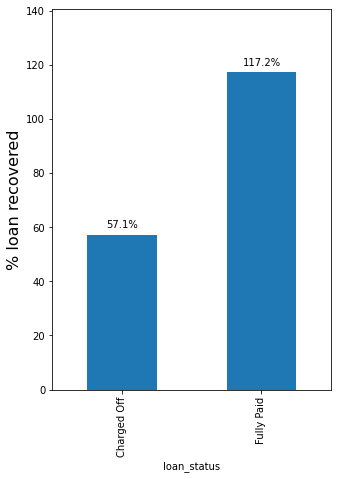

In [46]:
plt.figure(figsize=(5,7))
ax = (Datstat_loan.groupby('loan_status').total_pymnt.sum()*100/ Datstat_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

In [47]:
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [48]:
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [49]:
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [50]:
Datstat_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [51]:
Datarect_loan['interest_rate_buckets'] = round(Datarect_loan['int_rate'])

In [52]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('hls', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [53]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [54]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (Datarect_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('hls', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (Datarect_loan.loc[Datarect_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('hls', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [55]:
(Datarect_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.183213
B    30.288475
C    20.396344
D    13.380726
E     7.273626
F     2.659677
G     0.817940
Name: grade, dtype: float64

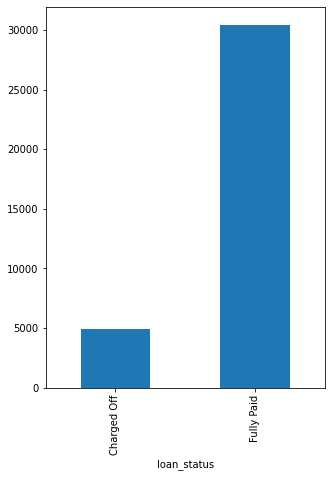

In [56]:
plt.figure(figsize=(5,7))
ax = Datstat_loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

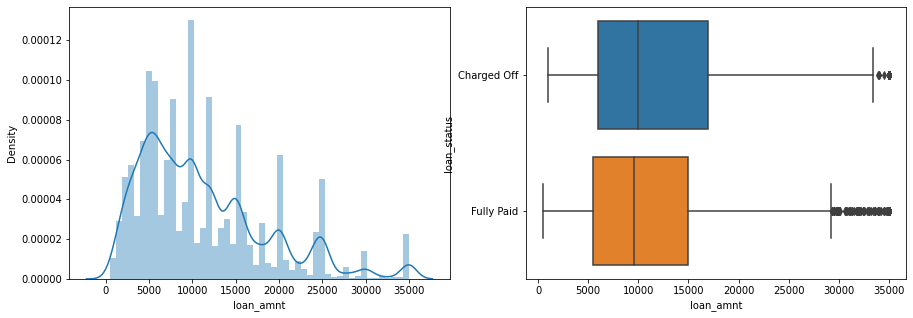

In [57]:
plot_distribution(Datstat_loan, 'loan_amnt')

In [58]:
Datstat_loan.groupby('loan_status')['loan_amnt'].describe()

# Charge off rate increases with increase in average loan amount
# LOan amount distribution is right-skewed and most loans granted were for 17000 and below

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [59]:
Datarect_loan['loan_amnt_bin'] = pd.cut(Datarect_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

<AxesSubplot:xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

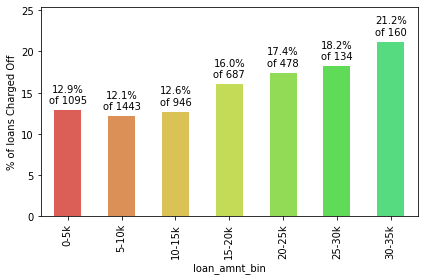

In [60]:
plotLoanStatus(Datarect_loan, 'loan_amnt_bin')

# Most loans issued are for 20000 and below and charge off rate increases as the loan amount increases

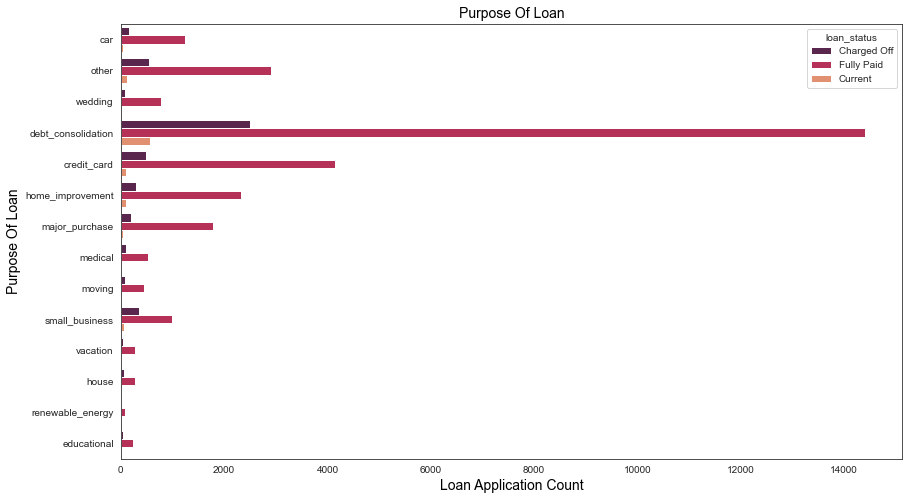

In [61]:
plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("white")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='rocket')
ax.set_title('Purpose Of Loan',fontsize=14,color='k')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'k')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'k')      
plt.show()

# Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bills
# Charged off count is also high for these two types of loan purpose

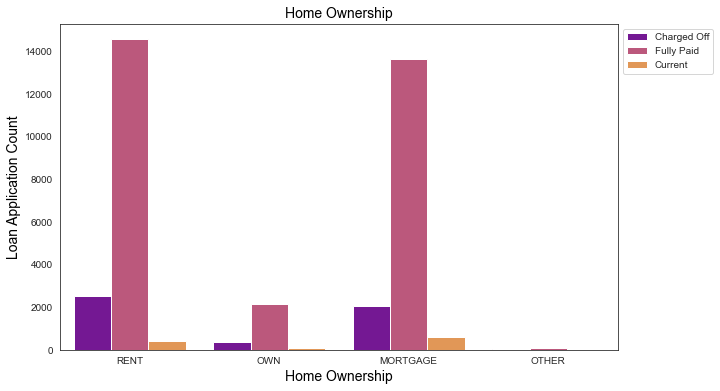

In [62]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='plasma')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='k')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k')      
plt.show()

# Plot shows that most of the applicants live in rented homes or mortgaged homes
# Applicant numbers are high for these home owner types and also the charged off count is high as well

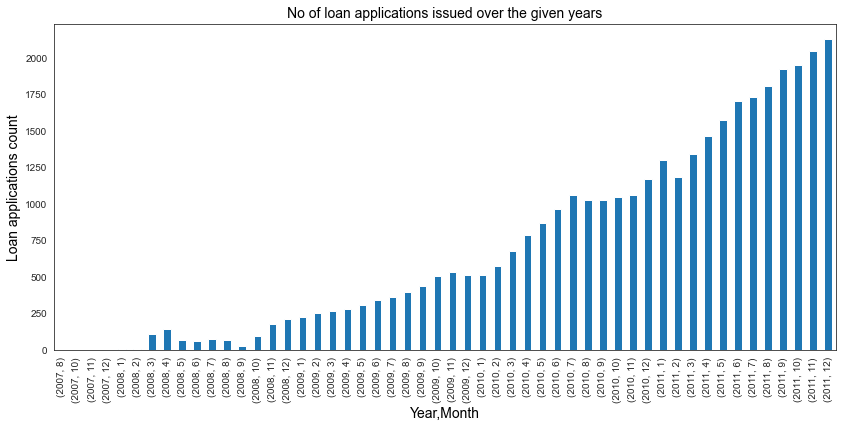

In [63]:
plt.figure(figsize=(14,6),facecolor='w')
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='k')
plt.xlabel('Year,Month',fontsize=14,color = 'k')      
plt.title("No of loan applications issued over the given years",fontsize=14,color='k')
plt.show()

# Plot shows that count of loan applications is increasing with every preceding year
# Increase in loan applications are also leading to increase in number of charged off loans with every year
# Number of loans issued in 2008 saw a sudden dip, this may be due to recession during that period

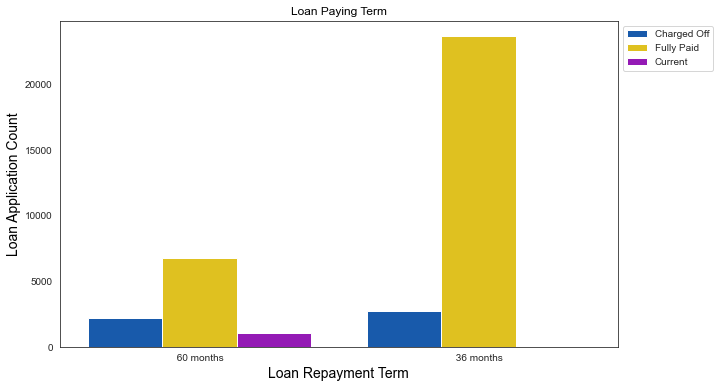

In [64]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='prism')
ax.set_title('Loan Paying Term',fontsize=12,color='k')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Plot shows that applicants whose loan repayment term was for 60 months had higher number of charged off loans
# Applicants whose loan repayment term was for 36 months comparitively have a lower number of charged off loans

In [65]:
inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,162,5,716,883,0.183465
1,20000-40000,1304,153,6305,7762,0.167998
2,40000-60000,1555,316,8899,10770,0.144383
3,60000-80000,918,231,6245,7394,0.124155
4,80000 +,1003,361,8247,9611,0.104360


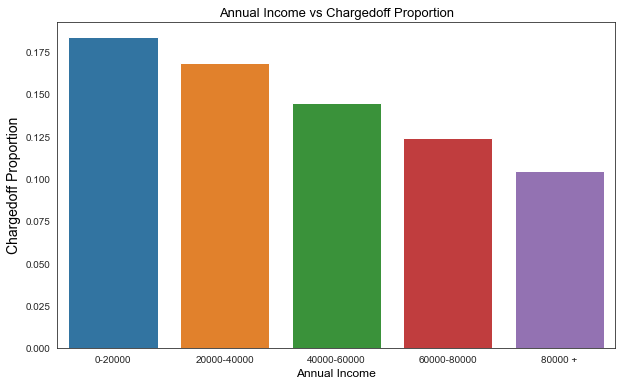

In [66]:
fig, ax1 = plt.subplots(figsize=(10, 6),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=13,color = 'k')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
ax1.set_xlabel('Annual Income',fontsize=12,color='k')
plt.show()

# Income range '80000+' have least charge off rate while '0-20000' have high charge off rate
# Annual income is inversely proportional to charge off rate

In [67]:
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,356.0,63.0,995.0,1414.0,0.251768
10,renewable_energy,15.0,1.0,72.0,88.0,0.170455
3,educational,45.0,0.0,231.0,276.0,0.163043
9,other,546.0,113.0,2916.0,3575.0,0.152727
5,house,52.0,13.0,278.0,343.0,0.151603
7,medical,95.0,12.0,527.0,634.0,0.149842
8,moving,79.0,6.0,444.0,529.0,0.149338
12,vacation,49.0,4.0,283.0,336.0,0.145833
2,debt_consolidation,2509.0,559.0,14402.0,17470.0,0.143618
4,home_improvement,296.0,91.0,2318.0,2705.0,0.109427


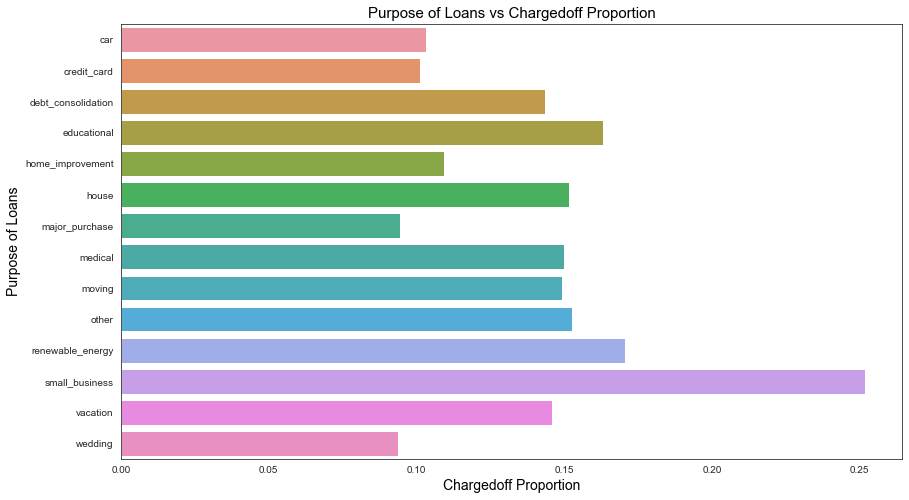

In [68]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'k')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='k')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()

# Small business loan applicants have high chances of getting loans charged off

In [69]:
grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,93,16,189,298,0.312081
5,F,286,67,616,969,0.295150
4,E,648,169,1833,2650,0.244528
3,D,980,212,3683,4875,0.201026
2,C,1170,250,6011,7431,0.157449
1,B,1253,317,9465,11035,0.113548
0,A,513,35,8627,9175,0.055913


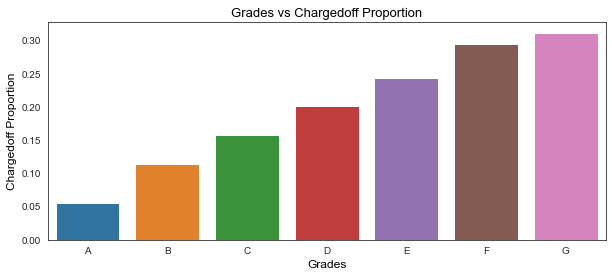

In [70]:
fig, ax1 = plt.subplots(figsize=(10, 4),facecolor='w')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=13,color='k')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=12,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color ='k')
plt.show()

# Grade "A" has lowest chance of charge off
# Grade "F" and "G" have the highest chances of charge off respectively
# Chances of charge off increases with each grade increment from "A" towards "G"

In [71]:
emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,10+ years,1233,379,6795,8407,0.146663
7,7 years,248,59,1390,1697,0.146140
8,8 years,191,44,1170,1405,0.135943
6,6 years,287,59,1775,2121,0.135314
5,5 years,422,86,2621,3129,0.134867
0,1 year,408,67,2551,3026,0.134831
3,3 years,521,81,3312,3914,0.133112
10,< 1 year,530,74,3448,4052,0.130800
4,4 years,427,91,2779,3297,0.129512
2,2 years,529,95,3554,4178,0.126616


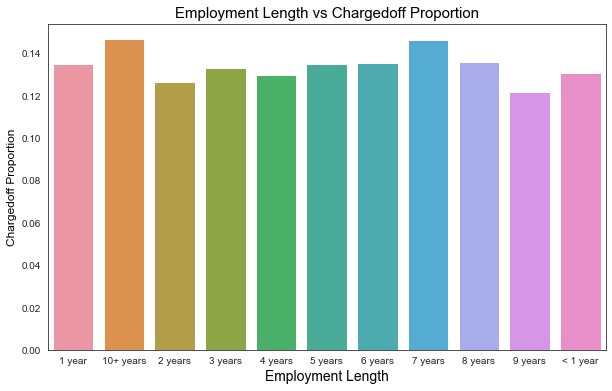

In [72]:
fig, ax1 = plt.subplots(figsize=(10, 6),facecolor='w')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'k')
plt.show()

# Loan applicants with 1 year or lesser work experience have high chances of getting loans charged off

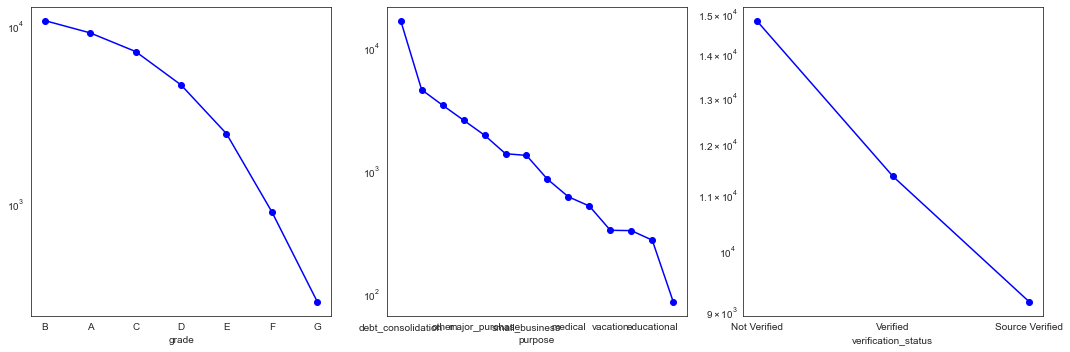

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
Datstat_loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
Datstat_loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
Datstat_loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

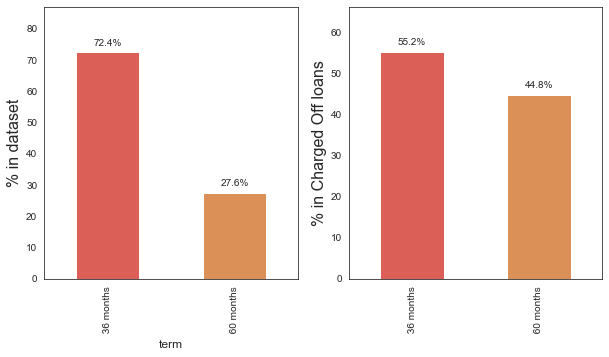

In [74]:
plt.figure(figsize=(10,5))
plot_percentages(Datarect_loan, 'term')

# About 72% loans issued had a repayment term of 36 months while 28% had a term of 60 months
# Though loan volume of 60 month term loans are lower but the default rate is about 45%

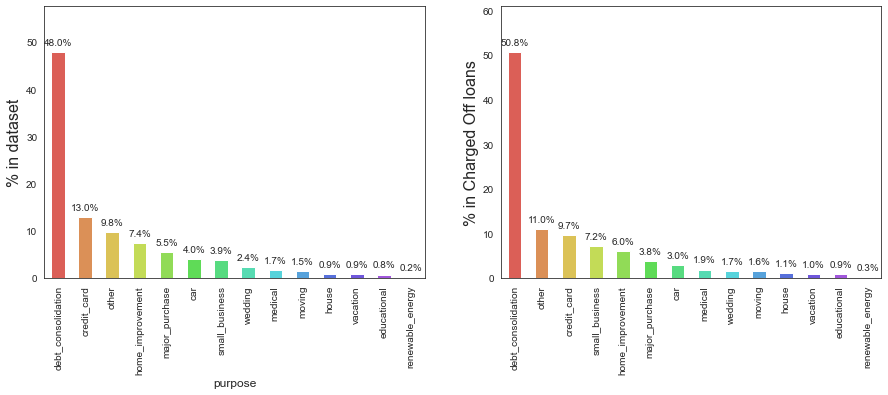

In [75]:
plt.figure(figsize=(15,5))
plot_percentages(Datstat_loan, 'purpose')

# Approximately 48% of overall loans were issued for the purpose of debt consolidation

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

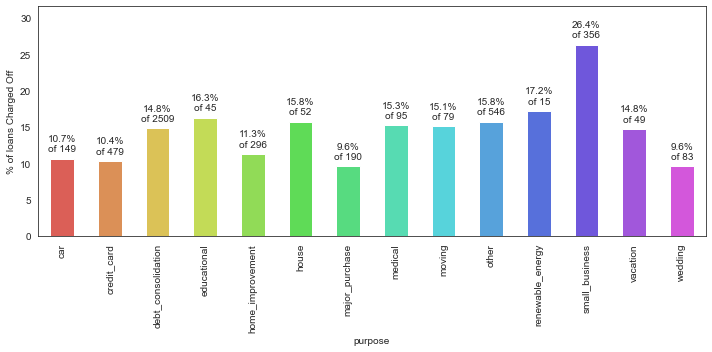

In [76]:
plt.figure(figsize=(10, 5))
plotLoanStatus(Datstat_loan, 'purpose')

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

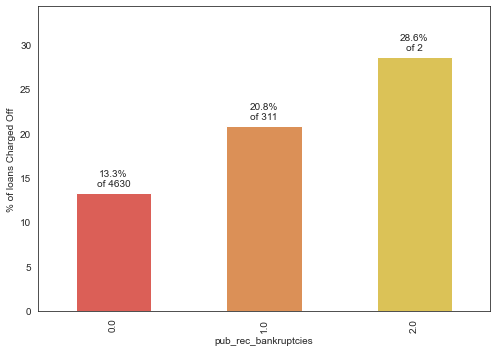

In [77]:
plt.figure(figsize=(7,5))
plotLoanStatus(Datarect_loan, 'pub_rec_bankruptcies')

In [78]:
Datstat_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [79]:
Datstat_loan.groupby('loan_status')['int_rate'].describe()

# Interest rate offered varies between 5.42% and 24.4% with average interest rate of 11.8%

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [80]:
pd.options.mode.chained_assignment = None

In [81]:
Datstat_loan['interest_rate_buckets'] = round(Datstat_loan['int_rate'])

<AxesSubplot:xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

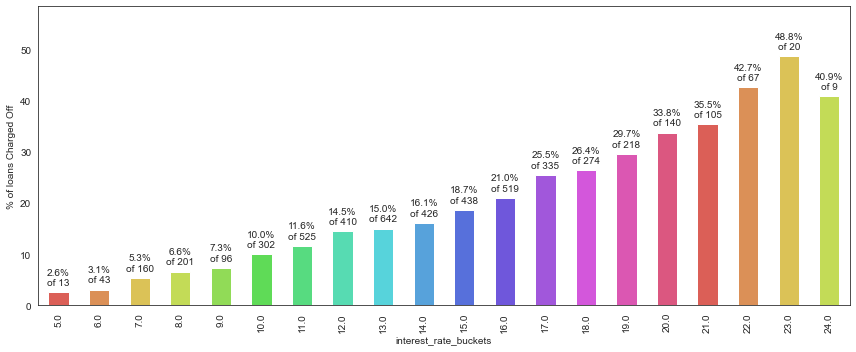

In [82]:
plt.figure(figsize=(12,5))
plotLoanStatus(Datstat_loan, 'interest_rate_buckets')

<Figure size 1080x360 with 0 Axes>

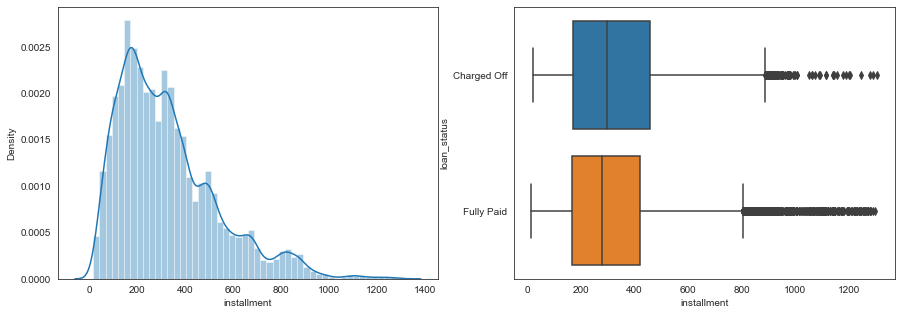

In [83]:
plt.figure(figsize=(15,5))
plot_distribution(Datstat_loan, 'installment')

In [84]:
Datstat_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


In [85]:
Datstat_loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

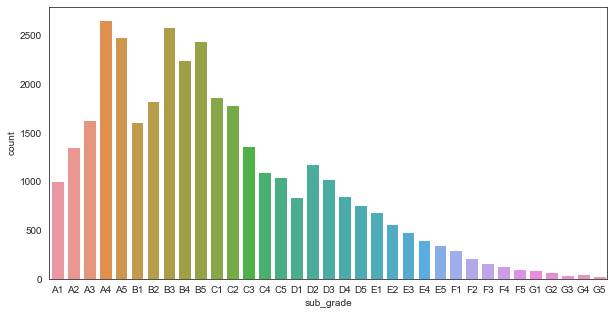

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(Datstat_loan['sub_grade'], order=sorted(Datstat_loan.sub_grade.unique()))
plt.show()

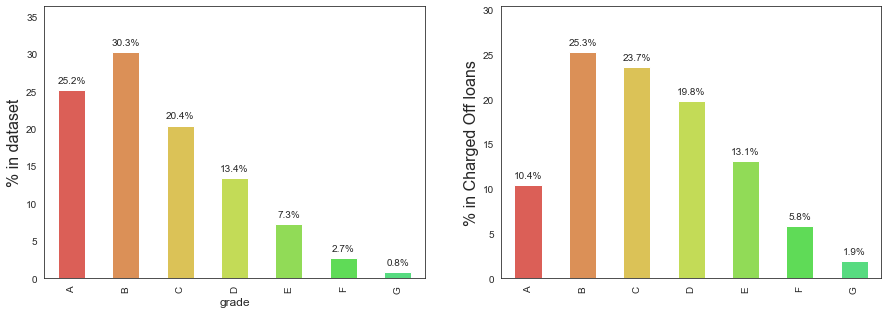

In [87]:
plt.figure(figsize=(15,5))
plot_percentages(Datstat_loan, 'grade', True)

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

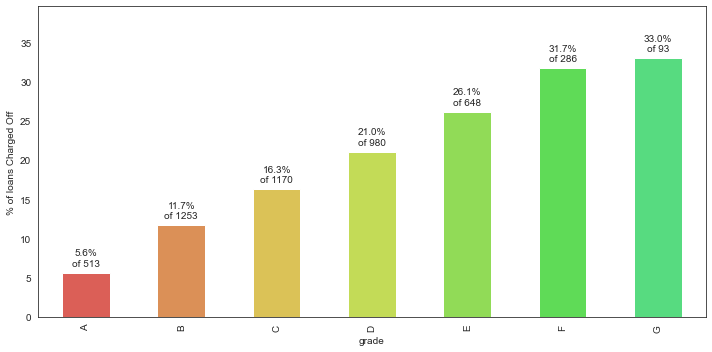

In [88]:
plt.figure(figsize=(10,5))
plotLoanStatus(Datstat_loan, 'grade')

<AxesSubplot:title={'center':'int_rate'}, xlabel='grade'>

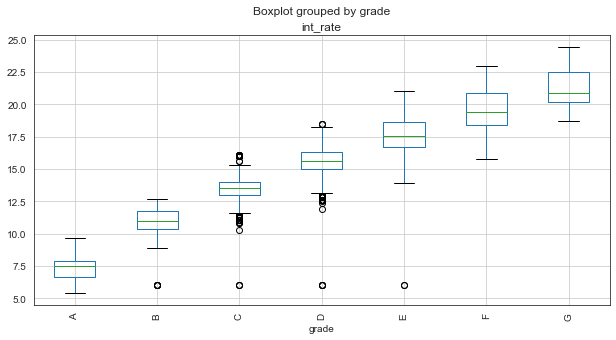

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
Datstat_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

In [90]:
topten_emp_title = Datstat_loan.emp_title.value_counts(normalize=False).head(10)
topten_emp_title

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

In [91]:
Datstat_loan.emp_length.value_counts(normalize=True)

10+ years    0.226991
2 years      0.115447
< 1 year     0.112478
3 years      0.108378
4 years      0.090649
5 years      0.086041
1 year       0.083666
6 years      0.058303
7 years      0.046314
8 years      0.038482
9 years      0.033251
Name: emp_length, dtype: float64

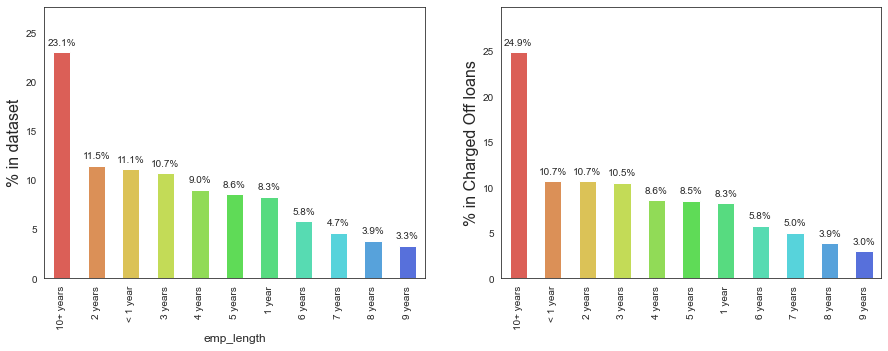

In [92]:
plt.figure(figsize=(15, 5))
plot_percentages(Datstat_loan, 'emp_length')

In [93]:
Datstat_loan.revol_util.describe()

# Average Revolving line utilization rate is around 49%

count    35367.000000
mean        49.139015
std         28.228038
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [94]:
Datstat_loan['revol_util_bin'] = round(Datstat_loan['revol_util']/5)

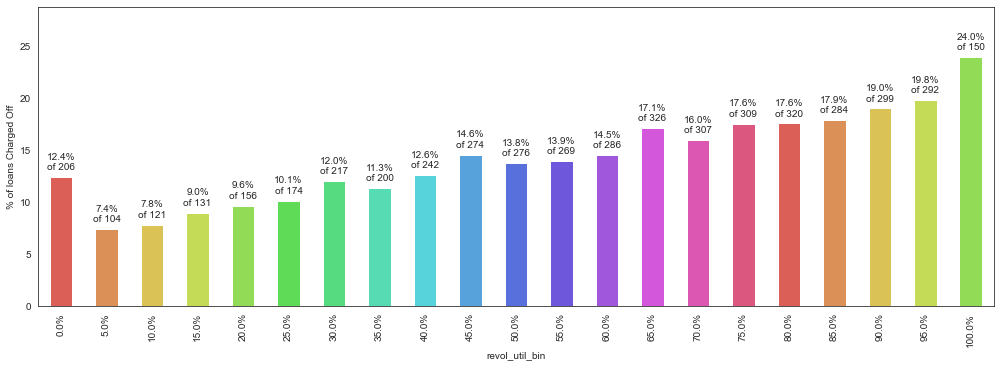

In [95]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(Datstat_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

In [96]:
Datstat_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

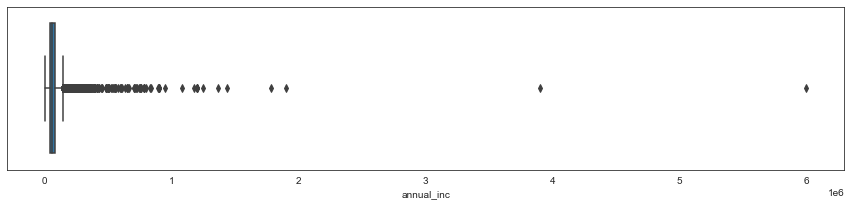

In [97]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=Datstat_loan['annual_inc'], data=Datstat_loan)

In [98]:
Datarect_loan.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [99]:
Datstat_loan['income_bin'] = Datstat_loan['annual_inc']/20000
Datstat_loan['income_bin'] = Datstat_loan['income_bin'].astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

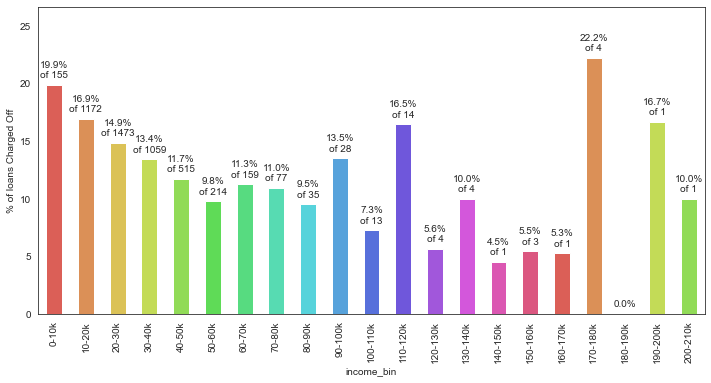

In [100]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(Datstat_loan.loc[Datstat_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

In [101]:
Datstat_loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

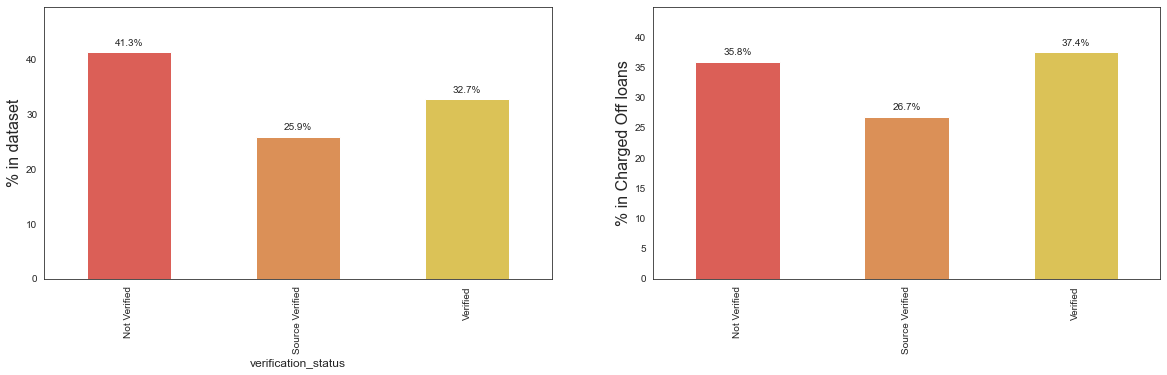

In [102]:
plt.figure(figsize=(20,5))
plot_percentages(Datstat_loan, 'verification_status', True)

# 'Non Verified' loans are higher than 'Source Verified' and 'Verified' loans
# 'Non Verified' loans should be reduced and verification should be done at all times to reduce loan defaults

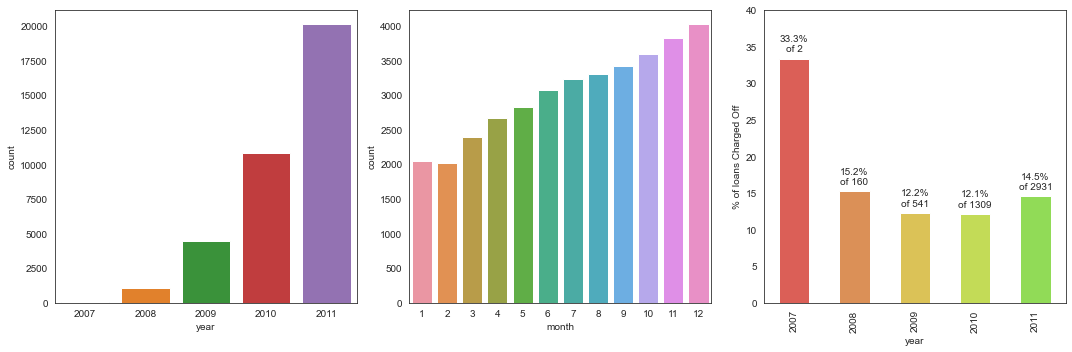

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan['year'], order=sorted(loan.year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan['month'], order=sorted(loan.month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(loan, 'year')

plt.show()

# Loans approved have increased year on year since 2007 to 2011
# Loans approved increases month on month through the year with December being the highest contributor
# Charge off rate vs YOY loan volume does not show any significant results or provide any insights

<AxesSubplot:xlabel='month', ylabel='% of loans Charged Off'>

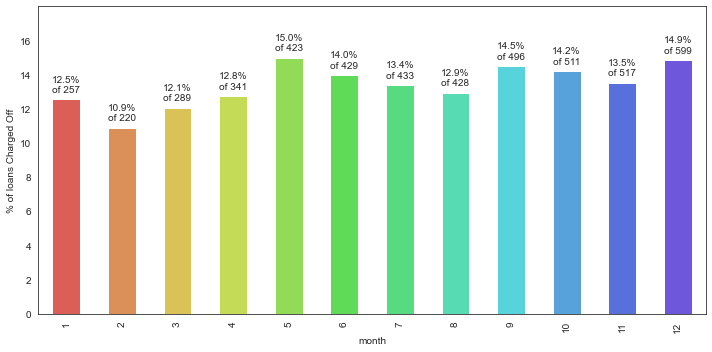

In [104]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'month')

# Loan issued month vs charge off is spread across all the months and shows no significant variance or pattern

In [105]:
Datstat_loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [106]:
Datstat_loan.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

In [107]:
Datstat_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: addr_state, dtype: float64

In [108]:
Datstat_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [109]:
Datarect_loan['dti_bin'] = pd.cut(Datarect_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

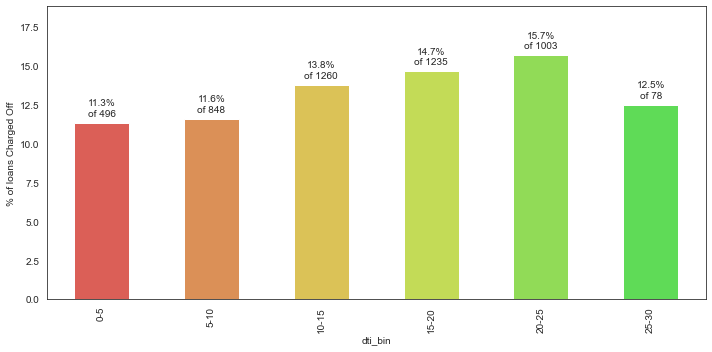

In [110]:
plt.figure(figsize=(10,5))
plotLoanStatus(Datarect_loan, 'dti_bin')

# As dti increases subsequently loan default increases esp. dti > 20 is high risk for charge off

#### Variable - delinq_2yrs - No. of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [111]:
Datstat_loan.delinq_2yrs.value_counts(normalize=True)

0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
9     0.000028
11    0.000028
Name: delinq_2yrs, dtype: float64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

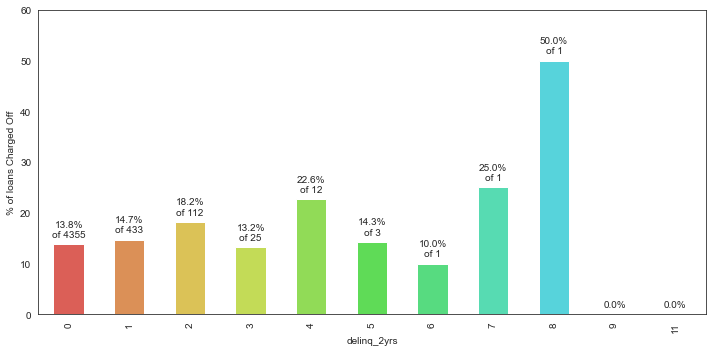

In [112]:
plt.figure(figsize=(10,5))
plotLoanStatus(Datstat_loan, 'delinq_2yrs')

#### Observation - delinq_2yrs ranges between 0 and 11. If the variable is greater than 1 then there are higher chances of default

In [113]:
Datstat_loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: earliest_cr_line_year, dtype: float64

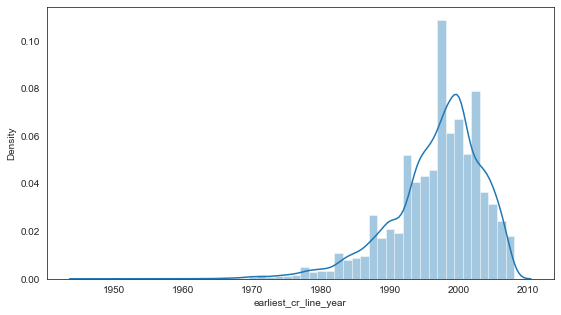

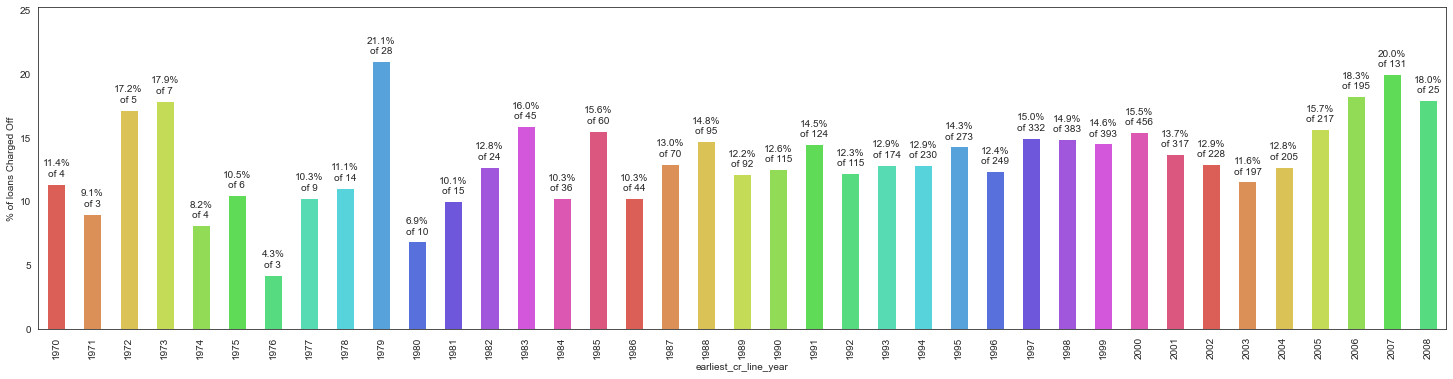

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(Datstat_loan['earliest_cr_line_year'])


plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(Datstat_loan.loc[Datstat_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

# Earliest credit line year is 2000 for 8% of loan applicants
# Overall newer applicants have a higher default rate however market recession too had an impact on default rates

In [115]:
Datstat_loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

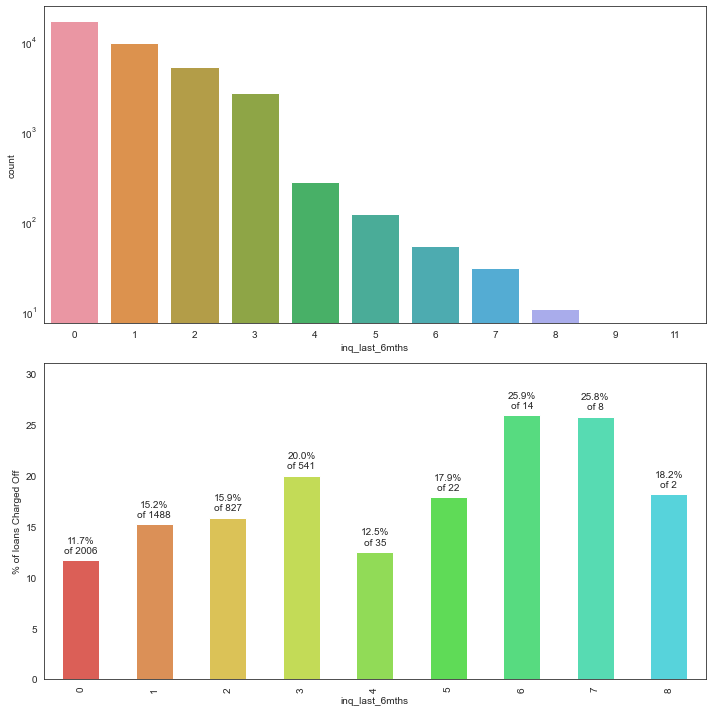

In [116]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(Datstat_loan['inq_last_6mths'], order=sorted(Datstat_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(Datstat_loan, 'inq_last_6mths')
plt.show()

# 48.5% of applicants do not make any inquiries and applicants with higher inquiries have a higher default rate
# No significant insights can be drawn with the number of inquiries parameter

In [117]:
Datstat_loan.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [118]:
Datstat_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


#### Median of the distribution shows that mostly the borrowers seem to have 9 open credit lines
#### There is no significant differnce in the credit lines of charged off and fully paid loans

In [119]:
Datstat_loan.pub_rec.value_counts(normalize=True)

0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

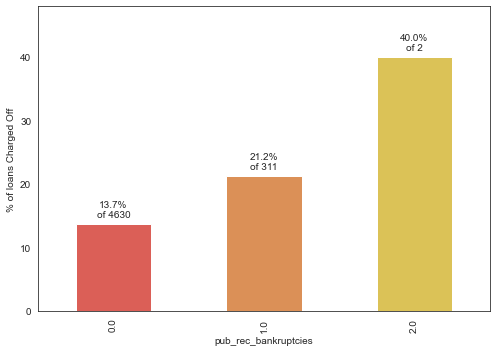

In [120]:
plt.figure(figsize=(7,5))
plotLoanStatus(Datstat_loan, 'pub_rec_bankruptcies')

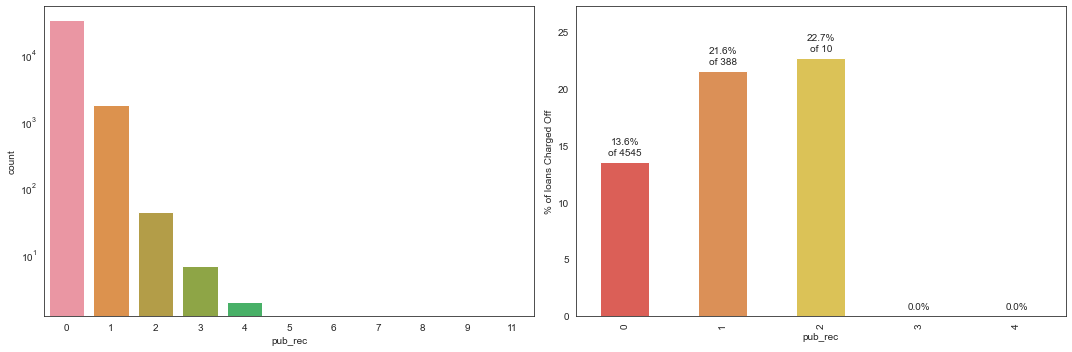

In [121]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(Datstat_loan['pub_rec'], order=sorted(Datstat_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(Datstat_loan, 'pub_rec')
plt.show()

#### 94% have no public derogatory records however 5% have atleast 1 derogatory record. Chances of charge off are significant even with 1 derogatory record identified.

In [122]:
Datstat_loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='ratio_bin', ylabel='% of loans Charged Off'>

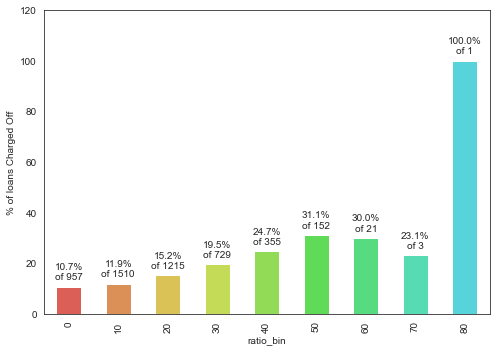

In [123]:
Datstat_loan['ratio'] = Datstat_loan['loan_amnt'] * 10 / Datstat_loan['annual_inc']
Datstat_loan['ratio_bin'] = (Datstat_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(Datstat_loan, 'ratio_bin')

# Charge off rate is loan amount to annual income ratio is 20% or lower

## Bivariate Analysis

#### loan_amnt vs annual_inc

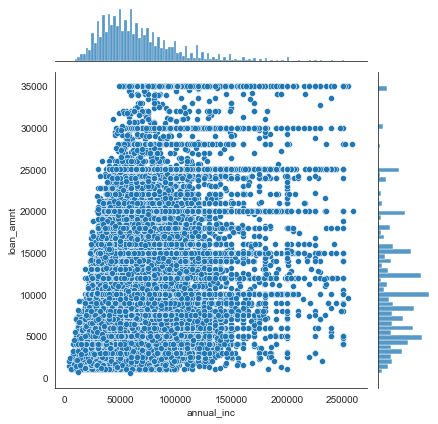

In [125]:
sns.jointplot('annual_inc', 'loan_amnt', Datstat_loan.loc[Datstat_loan['annual_inc']<260000])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

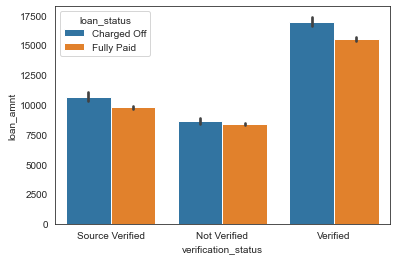

In [126]:
# loan_amnt vs verification_status vs loan status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=Datstat_loan, estimator=np.mean)

# Loans with higher amounts are verified more which is a good practice as they also have high default rate

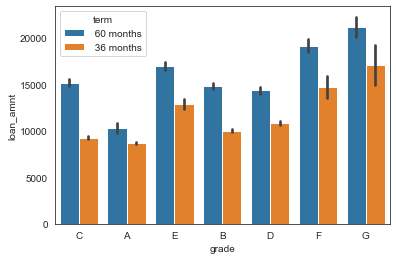

In [127]:
# Loan amount vs Grade vs Term
sns.barplot(x='grade', y='loan_amnt', hue="term", data=Datstat_loan, estimator=np.mean)
plt.show()

# Loans with higher amounts are associated with lower grade as well as longer repayment term

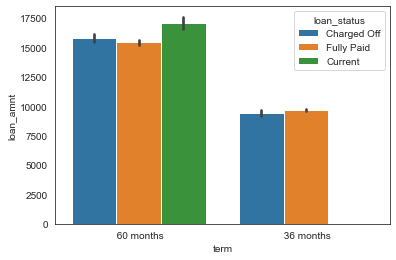

In [128]:
# Loan amount Vs term Vs Loan Status
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=Datarect_loan, estimator=np.mean)
plt.show()

# Loans with higher amounts are associated with higher loan repayment term and also higher chare off

In [129]:
corr=Datstat_loan.corr()
corr['loan_amnt']

id                         0.123293
member_id                  0.124153
loan_amnt                  1.000000
funded_amnt                0.981570
funded_amnt_inv            0.951842
int_rate                   0.299997
installment                0.930743
annual_inc                 0.258984
dti                        0.063093
delinq_2yrs               -0.035290
inq_last_6mths             0.010000
open_acc                   0.174265
pub_rec                   -0.046942
revol_bal                  0.319781
revol_util                 0.067081
total_acc                  0.255773
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                0.884286
total_pymnt_inv            0.860199
total_rec_prncp            0.848788
total_rec_int              0.728815
total_rec_late_fee         0.046662
recoveries                 0.143550
collection_recovery_fee    0.079357
last_pymnt_amnt            0.477646
policy_code                     NaN
acc_now_delinq              

<AxesSubplot:>

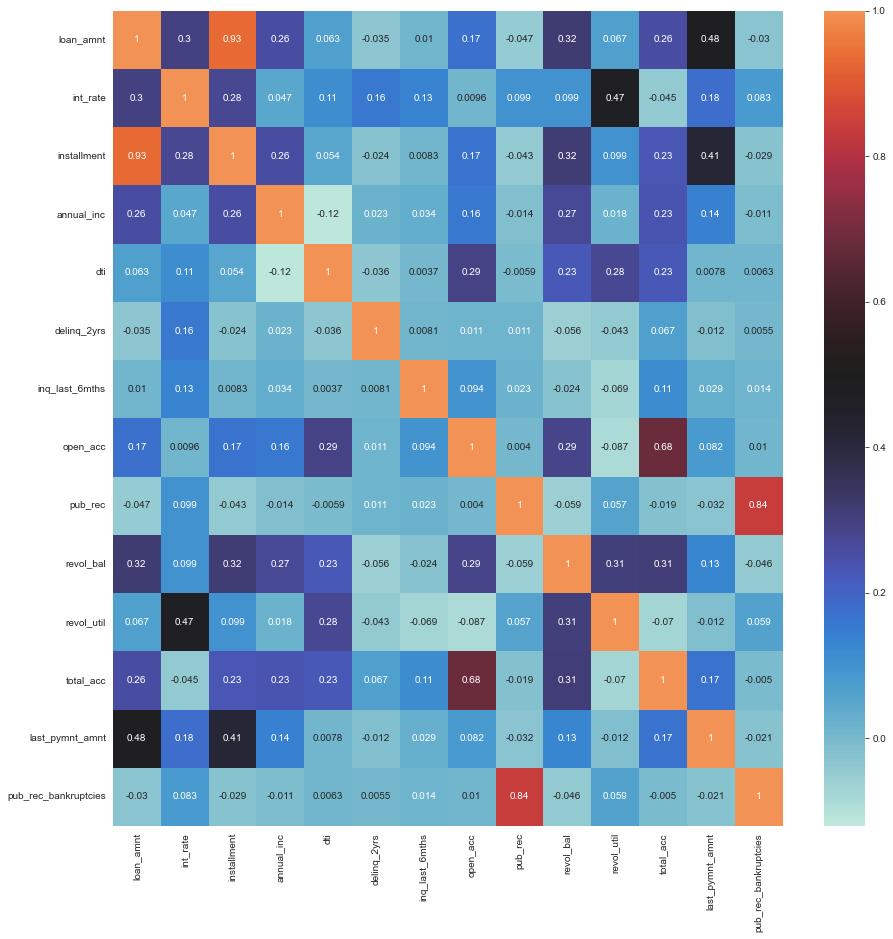

In [130]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = Datstat_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

# Correlation Observations: 
# loan_amnt is correlated to last_payment_amount 
# int_rate is correlated to revol_util as company is charging higher interest rates for riskier loans
# Positive correlation between annual income and employment years - Income increases with work experience rising
# Annual income and DTI(Debt-to-income ratio) are negatively correlated
# No correlation found between delinq_2yrs and public record of bankruptcy

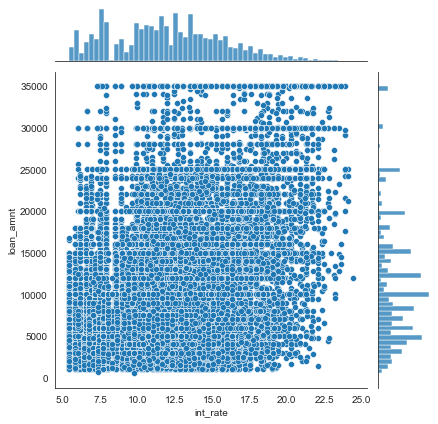

In [131]:
sns.jointplot('int_rate', 'loan_amnt', Datstat_loan)

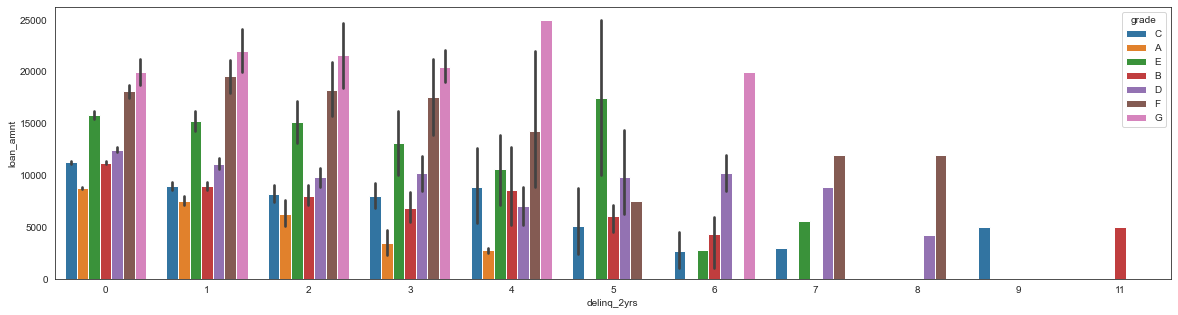

In [132]:
# delinq_2yr VS loan amount VS grade

plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=Datstat_loan, estimator=np.mean)
plt.show()

# Number of loans approved reduces with increase in number of delinquencies
# Loans should be restricted and not approved if no. of delinquencies is 2 or more

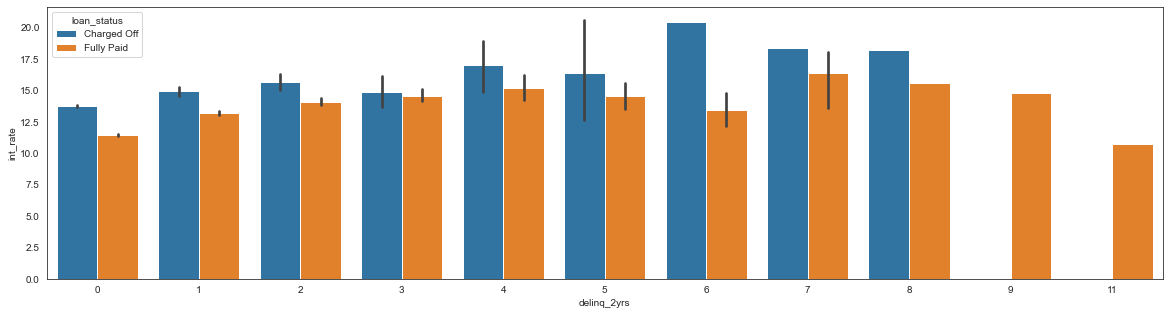

In [133]:
# delinq_2yr VS int_rate VS loan_status
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=Datstat_loan, estimator=np.mean)
plt.show()

# Interest rate increases with increase in delinquency count of applicant

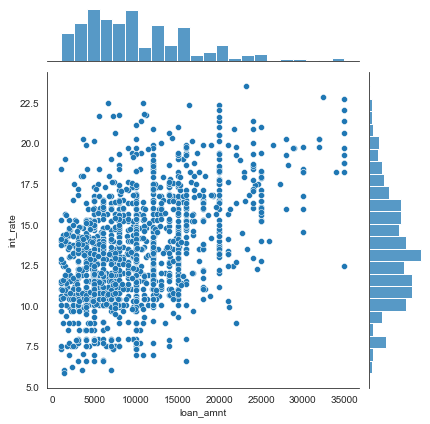

In [134]:
sns.jointplot('loan_amnt', 'int_rate', Datstat_loan.loc[Datstat_loan.pub_rec_bankruptcies > 0])

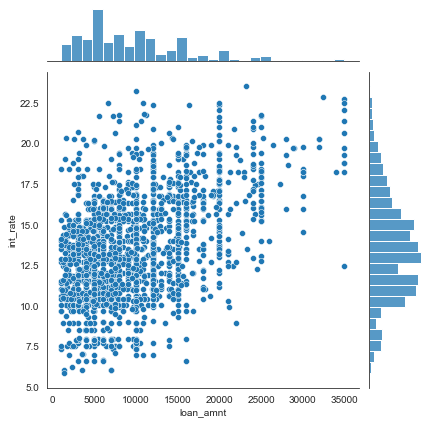

In [135]:
sns.jointplot('loan_amnt', 'int_rate', Datstat_loan.loc[Datstat_loan.pub_rec > 0])

In [136]:
Datstat_loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.839795
pub_rec_bankruptcies,0.839795,1.000000


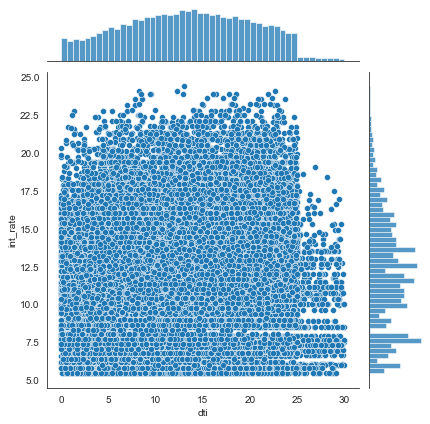

In [137]:
sns.jointplot('dti', 'int_rate', Datstat_loan)

In [138]:
Location_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Location_vs_loan['Total'] = Location_vs_loan['Charged Off'] + Location_vs_loan['Current'] + Location_vs_loan['Fully Paid'] 
Location_vs_loan['Chargedoff_Proportion'] = Location_vs_loan['Charged Off'] / Location_vs_loan['Total']

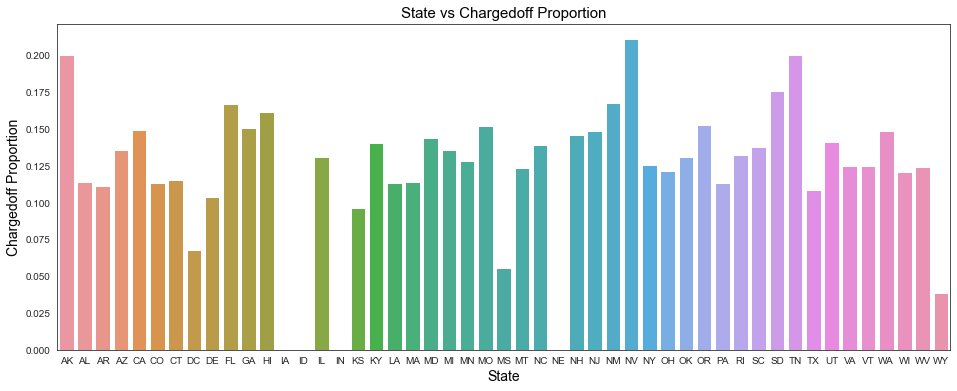

In [139]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='w')
ax1.set_title('State vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=Location_vs_loan)
ax1.set_xlabel('State',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()

# NE has high charge offs however the number of applications are low
# Other states do not show any significant variance hence no potential insights can be drawn

In [140]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

In [141]:
loan_comb = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_comb.head()

,loan_amnt,annual_inc,year,int_rate,loan_status
1,2500,30000.0,2011,15.27%,Charged Off
3,10000,49200.0,2011,13.49%,Fully Paid
4,3000,80000.0,2011,12.69%,Current
5,5000,36000.0,2011,7.90%,Fully Paid
6,7000,47004.0,2011,15.96%,Fully Paid


In [142]:
loan_comb['loan_amnt'] = np.log10(loan_comb['loan_amnt'])
loan_comb['annual_inc'] = np.log10(loan_comb['annual_inc'])

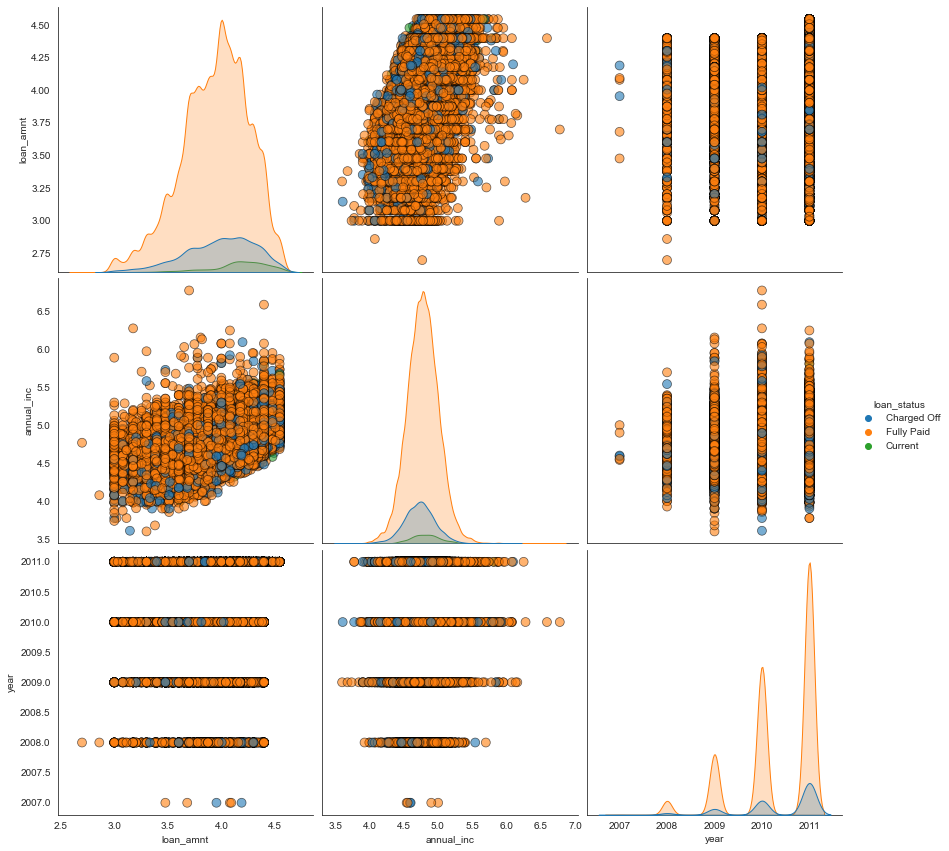

In [143]:
sns.pairplot(loan_comb, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
plt.show()

#### Charge off rate increases as interest rate increases
#### Loan amount increases with increase in income
#### Number of charge offs are increasing with every incremental year